# Predicting whether a Person Has Heart Disease Or not
In this model we use person's medical attribute to predict whether a person has a heart disease or not

## We are going to following approach:
  1. Problem defination
  2. Data
  3. evaluating
  4. features
  5. modelling
  6. experimentation
  
## Problem defination
  Given a patient's medical conditions can we predict whether a patient a heart disease or not.

## Data
The original dataset came from UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/heart+disease

THe actual data is available on kaggle also 

## Evaluation
If we are sucessful on achieving a 90-95% accuracy on predicting whether aperson has heart disease not. if we achieve thatr we can pursue our project next.


## Features

In this section we talk about parameters that we know how it works.
**Create data dictionary**

1. age: age in years
2. (sex)=0-female ,1-Male
3. cp: chest pain type

     Value 1: typical angina
     Value 2: atypical angina
     Value 3: non-anginal pain
     Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST         elevation or depression of > 0.05 mV)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
      Value 1: upsloping
      Value 2: flat
      Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.  num: diagnosis of heart disease (angiographic disease status)
     Value 0: < 50% diameter narrowing




## Preparing the tools
 We are going to use Pandas Numpy for Data analysis and Manipulation

In [2]:
#import all the tools that we need



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



%matplotlib inline 
# we need our plots to appear inside a notebook

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve


# Load Data 

In [3]:
df=pd.read_csv("heart-disease.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration

The goal here is to find out more about data and becomes a subject matter expert on the dataset you're working with.

1. what question you are trying to solve 
2. what kind of data do we have 
3. what's missing from data how do we deal with it
4. where are the outliers and why should you care about them?
5. how can u add,remove,change features to get more out of your data?


In [4]:
# let's find how many type of are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

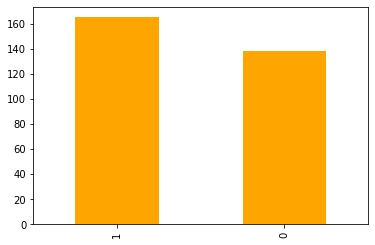

In [5]:
df["target"].value_counts().plot(kind="bar" ,color="orange");

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease Frequency according to sex

In [7]:
ty=df.sex.value_counts()


In [8]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


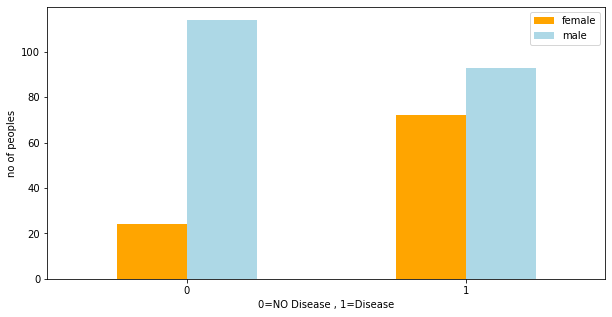

In [9]:
#compare target column with sex columns
pd.crosstab(df.target,df.sex).plot(kind ="bar",figsize=(10,5),color=["orange","lightblue"]);
plt.legend(["female","male"]);
plt.xticks(rotation=0);
plt.ylabel("no of peoples");
plt.xlabel("0=NO Disease , 1=Disease");
#xticks used to ratate x axis value to be straight

## Heart Disease in function of age and max Heart rate

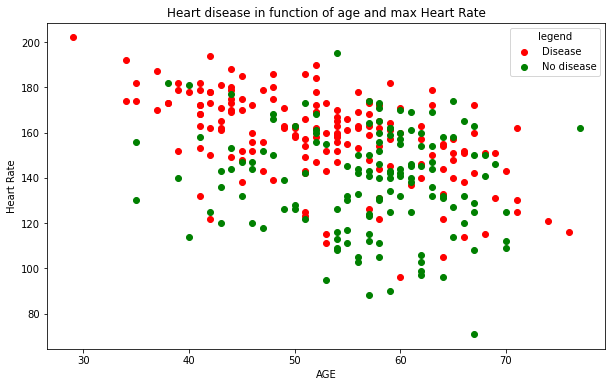

In [10]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df["age"][df["target"]==1],df["thalach"][df["target"]==1],color="red");


ax.scatter(df["age"][df["target"]==0],df["thalach"][df["target"]==0],color="green");
ax.set(title="Heart disease in function of age and max Heart Rate",xlabel="AGE",ylabel="Heart Rate");
ax.legend(title="legend",labels=["Disease","No disease"]);

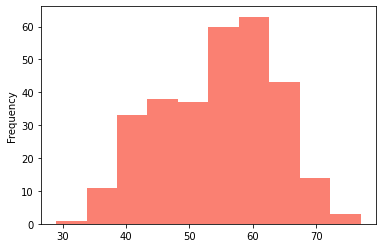

In [11]:
#check age distribution curve
df.age.plot(kind="hist",color="salmon");

## Heart disease Frequency vs Chest pain

cp: chest pain type

 0. typical angina
 1. atypical angina
 2. non-anginal pain
 3. asymptomatic

In [12]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


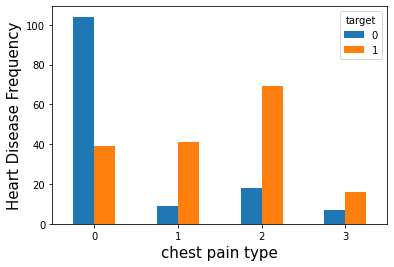

In [13]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar");
plt.xticks(rotation="0");
plt.xlabel("chest pain type",fontsize="15");
plt.ylabel("Heart Disease Frequency",fontsize="15");


#make a correlation matrix

In [14]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


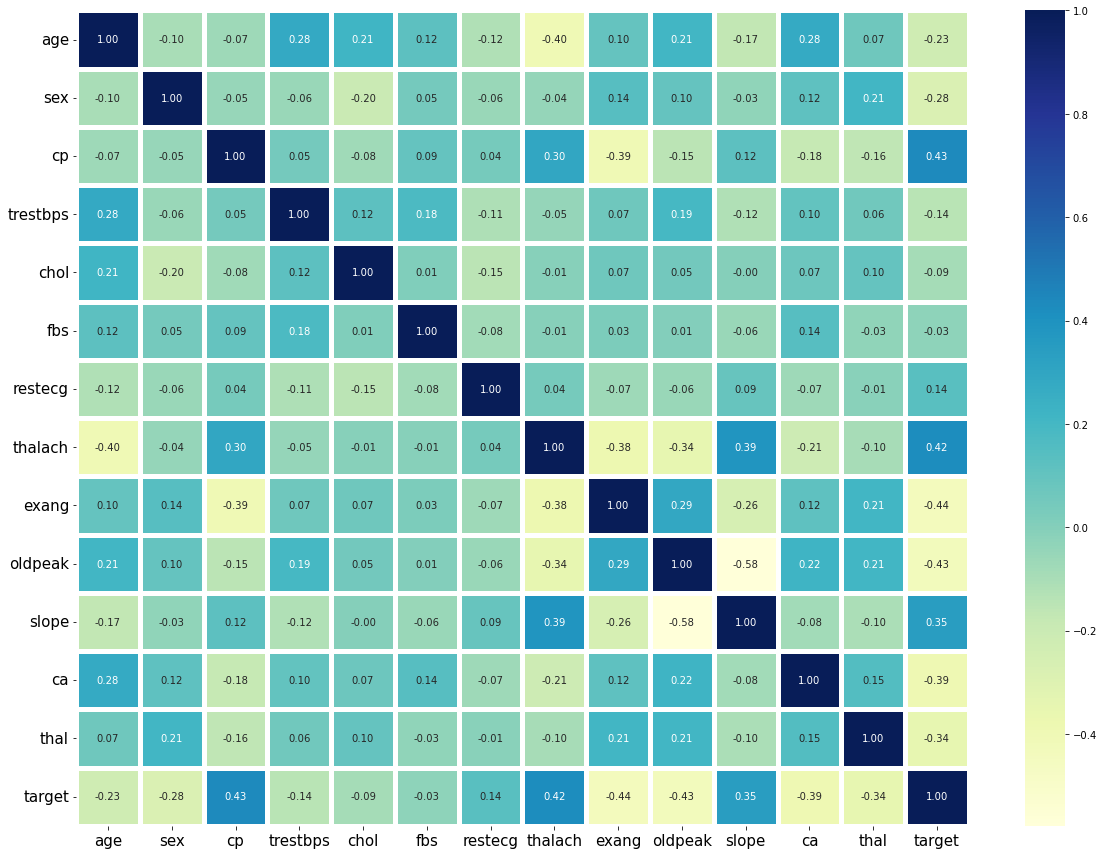

In [15]:
#make a seaborn matix

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=5,fmt=".2f",cmap="YlGnBu")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)

# Modelling 

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
x=df.drop("target",axis=1)
y=df["target"]

In [18]:
np.random.seed(4)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [126]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3


## We are going to try 3 different types of machine learning model
1. Logistic Regression
2. K-Nearest Neighbour
3. Random Forest Classifier

In [22]:
#put models in dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}


def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(4)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [21]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\singl\desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8688524590163934}

In [23]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8688524590163934}

# Model Score 

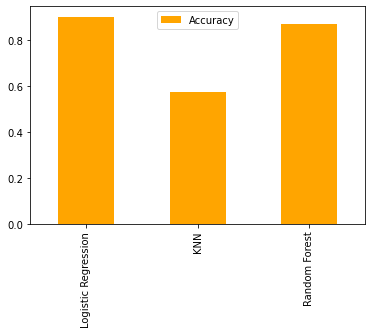

In [24]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar(color="orange");

Now we've got a baseline model and we know a model's first predictions aren't always what we should based our next steps off. what should do?

Let's Look at following:
1. Hyperparameters
2. Feature importance
3. confusion matrix
4. Cross_ validation
5. precision
6. recall
7. F1 score
8. Classification report
9. ROC curve
10. Area Under The curve(AUC)

# Hyperparameter tuning(By hand)


In [25]:
train_scores=[]
test_scores=[]
neighbors=range(1,21) 
knn=KNeighborsClassifier()
for i in neighbors: 
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
        

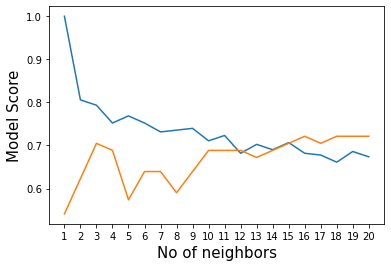

In [119]:
plt.plot(neighbors,train_scores,label="Train_scores")
plt.plot(neighbors,test_scores,label="Test_scores")
plt.xlabel("No of neighbors",fontsize=15)
plt.ylabel("Model Score",fontsize="15")
plt.xticks(np.arange(1,21,1));
         

 # Hyperparameter Tuning with RandomizedsearchCV
 
we're going to tune
1. logisticRegression
2. RandomForestClassifier()

 

In [26]:
# create a hyperparameter grid for logistic Regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
         
        }

In [120]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [27]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [28]:
# True LogisticRegression
np.random.seed(4)
# setup random hyperparameter search for logisticRegression 
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [30]:
rs_log_reg.score(x_test,y_test)

0.8688524590163934

Now we've tuned logistic Regresion and let's do the same for randomforestClassifier

In [31]:
np.random.seed(4)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True
                         )
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [145]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': None}

In [32]:
# Evaluate The randomizedsearch randomForestClassifier()
rs_rf.score(x_test,y_test)

0.9344262295081968

In [147]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8688524590163934}

# Hyperparameter tuning with GridSearchCV

  Since our RandomForestClassifier Model provides the best result so far, we'll try and improves them again using GridSearchCV

In [35]:
rf_grid={"n_estimators":np.arange(10,1000,100),
        "max_depth":[None,5,10],
         "min_samples_split":np.arange(2,20,10),
         "min_samples_leaf":np.arange(1,20,10)
        }

gs_rf=GridSearchCV(RandomForestClassifier(),
                       param_grid=rf_grid,
                       cv=2,
                       verbose=True)

gs_rf.fit(x_train,y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': array([ 1, 11]),
                         'min_samples_split': array([ 2, 12]),
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
             verbose=True)

In [154]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 510}

In [36]:
gs_rf.score(x_test,y_test)

0.9180327868852459

In [38]:
y_preds=gs_rf.predict(x_test)

In [161]:
y_preds

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [162]:
# Plot Roc Curve
plot_roc_curve(rs_rf,x_test,y_test)

NameError: name 'plot_roc_curve' is not defined

Text(6.0, 0.5, 'True label')

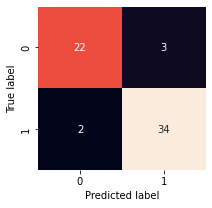

In [45]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [41]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



### calculate evaluation metrics using cross-validation
We're going to calculate precision,recall,f1-score of our model using cross-validation and to do so we'will be using cross_val_score()

In [48]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'n_estimators': 810}

In [57]:
clf=RandomForestClassifier(max_depth=None,
 min_samples_leaf= 11,
 min_samples_split= 2,
 n_estimators= 810)

In [63]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.81967213, 0.86666667, 0.76666667])

In [120]:
cv_acc=np.mean(cv_acc)

In [64]:
cv_pr=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pr

array([0.81081081, 0.90625   , 0.81818182, 0.85714286, 0.76315789])

In [118]:
cv_pr=np.mean(cv_pr)

In [72]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.87878788, 0.90909091, 0.81818182, 0.90909091, 0.87878788])

In [117]:
cv_recall=np.mean(cv_recall)
cv_recall

0.8787878787878787

In [68]:
#Cross validated F1-Score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84057971, 0.90909091, 0.8358209 , 0.89855072, 0.80555556])

In [121]:
cv_f1=np.mean(cv_f1)

<AxesSubplot:title={'center':'Cross-validated'}>

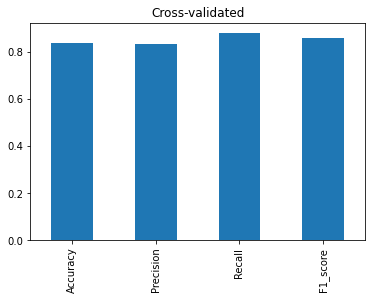

In [133]:
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                       "Precision":cv_pr,
                       "Recall":cv_recall,
                       "F1_score":cv_f1,},
                       index={0})


cv_metrics.T.plot.bar(title="Cross-validated",legend=False)

## Feature Importance
feature importance is another as asking, Which Featurtes contributed most to the outcomes of the model and how did they conribute

In [134]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [135]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': None}

In [160]:
clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=11, n_estimators=810)

In [137]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
coef=clf.feature_importances_

In [154]:
feature_dict=dict(zip(df.columns,list(coef)))
feature_dict

{'age': 0.05359051035504239,
 'sex': 0.037045659966705065,
 'cp': 0.18111278385044702,
 'trestbps': 0.022456236821544507,
 'chol': 0.023979776114563298,
 'fbs': 0.0003076606965678223,
 'restecg': 0.010533013715191577,
 'thalach': 0.1255891786447,
 'exang': 0.06013690664637,
 'oldpeak': 0.1260344877676684,
 'slope': 0.08305879357796121,
 'ca': 0.1366274080203611,
 'thal': 0.13952758382287767}

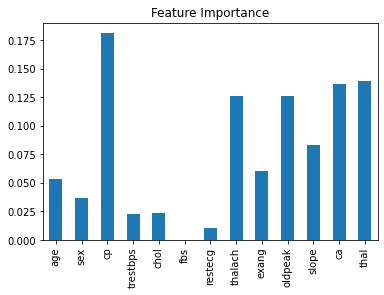

In [157]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);